# EXPLORATORY DATA ANALYSIS

**Description:** this notebook develop an explorating data analysis aiming to answer some questions and reveal the data distribution. With this notebook we aim to retrieve new ideas for the later dashboard in Kibana.

**Data:** the data loaded was from the Cloud Native Computing Foundation database.

**Team members:** Verónica Gómez, Carlos Grande y Pablo Olmos

**GitHub URL:** https://github.com/charlstown/CNCF_SurvivalAnalysis.git

## INDEX:
* [1. Explaining data](#data)
* [2.1 About developers](#developers)
* [2.2 About repositories](#repositories)
* [2.3 About organizations](#organizations)
---

## Libraries needed

In [1]:
from datetime import datetime
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search
from elasticsearch_dsl import Q
import json
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Connecting to elastic

In [2]:
elastic = Elasticsearch(["http://127.0.0.1:9200"])
idx =  'cncf_mapped'
print(elastic)

<Elasticsearch([{'host': '127.0.0.1', 'port': 9200}])>


In [3]:
indexes = elastic.indices.get_alias("*").keys()
[print(i) for i in indexes];

.async-search
cncf_dataset
.apm-agent-configuration
.kibana_task_manager_1
.apm-custom-link
company
cncf_mapped
.kibana_1


## Importing scripts
In this section we import the attributes from our python library **elastic_loader** saved on folder "src".

In [4]:
import sys
sys.path.append('../02_src/')
import elastic_query as eq

# EDA

## 1. Explaining data <a class="anchor" id="data">

In [5]:
ids = ['91d824e7ddb3a16bbe0e229fa62cc88a7415c3e2', \
       '3a64071cf70ac4c49760a34907ffde303cd6f867', \
       'e18491976256aef320e1adef030bf52f25b97367']


df = pd.DataFrame.from_dict([elastic.get(idx, i)['_source'] for i in ids])
df

,Author_gender,demography_min_date,metadata__gelk_backend_name,tz,project,metadata__timestamp,uuid,Author_user_name,cm_title,Commit_id,Commit_user_name,metadata__enriched_on,author_date,Author_domain,tag,author_bot,message_analyzed,author_org_name,hash_short,repository_labels,commit_date,Author_org_name,project_1,Author_uuid,offset,lines_added,utc_commit_date_weekday,committer_domain,author_date_hour,commit_date_weekday,Commit_uuid,branches,committer_name,Commit_gender,Author_gender_acc,author_date_weekday,Commit_org_name,files,metadata__gelk_version,author_id,hash,author_name,author_gender,utc_author,git_author_domain,is_git_commit,origin,utc_author_date_weekday,Author_id,url_id,title,github_repo,lines_changed,utc_commit_date_hour,demography_max_date,author_user_name,grimoire_creation_date,Commit_bot,author_gender_acc,Commit_gender_acc,Commit_domain,author_domain,repo_name,git_uuid,lines_removed,utc_commit,commit_date_hour,metadata__filter_raw,Author_bot,message,author_uuid,time_to_commit_hours,utc_author_date_hour,Commit_name,Author_name,metadata__updated_on
0,Unknown,2018-12-28T11:53:52.000Z,GitEnrich,-2,Graduated,2019-08-02T14:22:43.155789+00:00,91d824e7ddb3a16bbe0e229fa62cc88a7415c3e2,Unknown,Graduated,183f4592bb7b37d6053a6a9ce9980c599c766ba2,Unknown,2019-10-07T19:41:38.181669+00:00,2018-12-28T09:53:52,loadsmart.com,https://github.com/kubernetes/minikube.git,False,Adding ReportError test and HTTP Test server r...,Unknown,f948bf,[],2018-12-28T10:04:45,Unknown,Graduated,183f4592bb7b37d6053a6a9ce9980c599c766ba2,None,21,5,loadsmart.com,9,5,183f4592bb7b37d6053a6a9ce9980c599c766ba2,[],Amim Knabben,Unknown,0,5,Unknown,1,0.62.0,183f4592bb7b37d6053a6a9ce9980c599c766ba2,f948bf81368eb13afc7270e4ad9fd9a4126c6ff2,Amim Knabben,Unknown,2018-12-28T11:53:52,loadsmart.com,1,https://github.com/kubernetes/minikube.git,5,183f4592bb7b37d6053a6a9ce9980c599c766ba2,kubernetes/minikube/commit/f948bf81368eb13afc7...,Adding ReportError test and HTTP Test server r...,kubernetes/minikube,28,12,2018-12-28T12:44:34.000Z,Unknown,2018-12-28T09:53:52-02:00,False,0,0,loadsmart.com,loadsmart.com,https://github.com/kubernetes/minikube.git,91d824e7ddb3a16bbe0e229fa62cc88a7415c3e2,7,2018-12-28T12:04:45,10,None,False,Adding ReportError test and HTTP Test server r...,183f4592bb7b37d6053a6a9ce9980c599c766ba2,23.82,11,Amim Knabben,Amim Knabben,2018-12-28T12:04:45+00:00
1,Unknown,2017-08-14T08:13:15.000Z,GitEnrich,8,Graduated,2019-08-02T13:50:48.170987+00:00,3a64071cf70ac4c49760a34907ffde303cd6f867,Unknown,Graduated,89f70c744bcf132b71b68d11a2fecdd2b7c93cb4,Unknown,2019-10-07T18:37:00.312067+00:00,2017-08-29T03:20:29,huawei.com,https://github.com/kubernetes/website.git,False,Update images.md (#5212)\n\n* Update images.md...,Unknown,127225,[],2017-08-28T12:20:29,Unknown,Graduated,c04049bcd92d96bcfb399a80c9197c63dbc82728,None,15,1,users.noreply.github.com,3,1,89f70c744bcf132b71b68d11a2fecdd2b7c93cb4,[],Andrew Chen,Unknown,0,2,Unknown,1,0.62.0,c04049bcd92d96bcfb399a80c9197c63dbc82728,12722567fe7ef27611762e5bd611068735f7b68d,stewart-yu,Unknown,2017-08-28T19:20:29,huawei.com,1,https://github.com/kubernetes/website.git,1,c04049bcd92d96bcfb399a80c9197c63dbc82728,kubernetes/website/commit/12722567fe7ef2761176...,Update images.md (#5212),kubernetes/website,30,19,2019-05-22T07:45:51.000Z,Unknown,2017-08-29T03:20:29+08:00,False,0,0,users.noreply.github.com,huawei.com,https://github.com/kubernetes/website.git,3a64071cf70ac4c49760a34907ffde303cd6f867,15,2017-08-28T19:20:29,12,None,False,Update images.md (#5212)\n\n* Update images.md...,c04049bcd92d96bcfb399a80c9197c63dbc82728,0.00,19,Andrew Chen,stewart-yu,2017-08-28T19:20:29+00:00
2,Unknown,2018-09-29T17:50:34.000Z,GitEnrich,-4,Graduated,2019-08-02T14:12:22.173595+00:00,e18491976256aef320e1adef030bf52f25b97367,Unknown,Graduated,26d5d38867d0acce085b6b8daefd17322e820891,Unknown,2019-10-07T19:36:15.023664+00:00,2019-04-05T11:46:04,google.com,https://github.com/kubernetes/kubernetes.git,False,github.com/mitchellh/mapstructure v1.1.2

In [6]:
[print(col) for col in df.columns];

Author_gender
demography_min_date
metadata__gelk_backend_name
tz
project
metadata__timestamp
uuid
Author_user_name
cm_title
Commit_id
Commit_user_name
metadata__enriched_on
author_date
Author_domain
tag
author_bot
message_analyzed
author_org_name
hash_short
repository_labels
commit_date
Author_org_name
project_1
Author_uuid
offset
lines_added
utc_commit_date_weekday
committer_domain
author_date_hour
commit_date_weekday
Commit_uuid
branches
committer_name
Commit_gender
Author_gender_acc
author_date_weekday
Commit_org_name
files
metadata__gelk_version
author_id
hash
author_name
author_gender
utc_author
git_author_domain
is_git_commit
origin
utc_author_date_weekday
Author_id
url_id
title
github_repo
lines_changed
utc_commit_date_hour
demography_max_date
author_user_name
grimoire_creation_date
Commit_bot
author_gender_acc
Commit_gender_acc
Commit_domain
author_domain
repo_name
git_uuid
lines_removed
utc_commit
commit_date_hour
metadata__filter_raw
Author_bot
message
author_uuid
time_to_com

## 2. Running queries

### 2.1 About developers <a class="anchor" id="developers">

#### A. How many unique developers are in the CNCF project?

In [7]:
s = Search(using=elastic, index=idx)
s.aggs.metric('Number of developers', 'cardinality', field='Author_id')

result = s.execute()
result.to_dict()["aggregations"]

{'Number of developers': {'value': 16691}}

#### B. How many developers are involved filtered by year?

In [8]:
year = 2020    # please type the year to call the query

s = Search(using=elastic, index=idx).filter('range', author_date={'gt': datetime(year-1, 12, 12), 'lt': datetime(year, 1, 1)})
s.aggs.metric('developers', 'cardinality', field='author_id')
result = s.execute()
result.to_dict()["aggregations"]

{'developers': {'value': 686}}

In [9]:
years = range(2010, 2021)

output = []
for year in years:
    s = Search(using=elastic, index=idx).filter('range', author_date={'gt': datetime(year-1, 12, 12), 'lt': datetime(year, 1, 1)})
    s.aggs.metric('developers', 'cardinality', field='author_id')
    result = s.execute()
    result = result.to_dict()["aggregations"]['developers']['value']
    output.append(result)

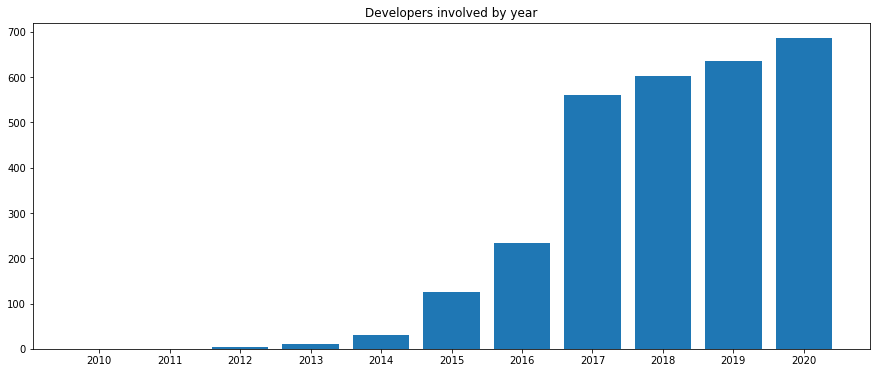

In [10]:
plt.figure(figsize=(15,6))
plt.bar(years, output)
plt.xticks(years, years)
plt.title('Developers involved by year')
plt.show()

#### C. Which are the 10 most active developers?

In [11]:
s = Search(using=elastic, index=idx)
s.aggs.bucket('best_developers', 'terms', field='author_name', size = 10)
result = s.execute()
result = result.to_dict()["aggregations"]['best_developers']['buckets']
df_developers = eq.documents_to_pandas(result).rename(columns = {'key':'developers', 'doc_count': 'n_commits'})
df

,Author_gender,demography_min_date,metadata__gelk_backend_name,tz,project,metadata__timestamp,uuid,Author_user_name,cm_title,Commit_id,Commit_user_name,metadata__enriched_on,author_date,Author_domain,tag,author_bot,message_analyzed,author_org_name,hash_short,repository_labels,commit_date,Author_org_name,project_1,Author_uuid,offset,lines_added,utc_commit_date_weekday,committer_domain,author_date_hour,commit_date_weekday,Commit_uuid,branches,committer_name,Commit_gender,Author_gender_acc,author_date_weekday,Commit_org_name,files,metadata__gelk_version,author_id,hash,author_name,author_gender,utc_author,git_author_domain,is_git_commit,origin,utc_author_date_weekday,Author_id,url_id,title,github_repo,lines_changed,utc_commit_date_hour,demography_max_date,author_user_name,grimoire_creation_date,Commit_bot,author_gender_acc,Commit_gender_acc,Commit_domain,author_domain,repo_name,git_uuid,lines_removed,utc_commit,commit_date_hour,metadata__filter_raw,Author_bot,message,author_uuid,time_to_commit_hours,utc_author_date_hour,Commit_name,Author_name,metadata__updated_on
0,Unknown,2018-12-28T11:53:52.000Z,GitEnrich,-2,Graduated,2019-08-02T14:22:43.155789+00:00,91d824e7ddb3a16bbe0e229fa62cc88a7415c3e2,Unknown,Graduated,183f4592bb7b37d6053a6a9ce9980c599c766ba2,Unknown,2019-10-07T19:41:38.181669+00:00,2018-12-28T09:53:52,loadsmart.com,https://github.com/kubernetes/minikube.git,False,Adding ReportError test and HTTP Test server r...,Unknown,f948bf,[],2018-12-28T10:04:45,Unknown,Graduated,183f4592bb7b37d6053a6a9ce9980c599c766ba2,None,21,5,loadsmart.com,9,5,183f4592bb7b37d6053a6a9ce9980c599c766ba2,[],Amim Knabben,Unknown,0,5,Unknown,1,0.62.0,183f4592bb7b37d6053a6a9ce9980c599c766ba2,f948bf81368eb13afc7270e4ad9fd9a4126c6ff2,Amim Knabben,Unknown,2018-12-28T11:53:52,loadsmart.com,1,https://github.com/kubernetes/minikube.git,5,183f4592bb7b37d6053a6a9ce9980c599c766ba2,kubernetes/minikube/commit/f948bf81368eb13afc7...,Adding ReportError test and HTTP Test server r...,kubernetes/minikube,28,12,2018-12-28T12:44:34.000Z,Unknown,2018-12-28T09:53:52-02:00,False,0,0,loadsmart.com,loadsmart.com,https://github.com/kubernetes/minikube.git,91d824e7ddb3a16bbe0e229fa62cc88a7415c3e2,7,2018-12-28T12:04:45,10,None,False,Adding ReportError test and HTTP Test server r...,183f4592bb7b37d6053a6a9ce9980c599c766ba2,23.82,11,Amim Knabben,Amim Knabben,2018-12-28T12:04:45+00:00
1,Unknown,2017-08-14T08:13:15.000Z,GitEnrich,8,Graduated,2019-08-02T13:50:48.170987+00:00,3a64071cf70ac4c49760a34907ffde303cd6f867,Unknown,Graduated,89f70c744bcf132b71b68d11a2fecdd2b7c93cb4,Unknown,2019-10-07T18:37:00.312067+00:00,2017-08-29T03:20:29,huawei.com,https://github.com/kubernetes/website.git,False,Update images.md (#5212)\n\n* Update images.md...,Unknown,127225,[],2017-08-28T12:20:29,Unknown,Graduated,c04049bcd92d96bcfb399a80c9197c63dbc82728,None,15,1,users.noreply.github.com,3,1,89f70c744bcf132b71b68d11a2fecdd2b7c93cb4,[],Andrew Chen,Unknown,0,2,Unknown,1,0.62.0,c04049bcd92d96bcfb399a80c9197c63dbc82728,12722567fe7ef27611762e5bd611068735f7b68d,stewart-yu,Unknown,2017-08-28T19:20:29,huawei.com,1,https://github.com/kubernetes/website.git,1,c04049bcd92d96bcfb399a80c9197c63dbc82728,kubernetes/website/commit/12722567fe7ef2761176...,Update images.md (#5212),kubernetes/website,30,19,2019-05-22T07:45:51.000Z,Unknown,2017-08-29T03:20:29+08:00,False,0,0,users.noreply.github.com,huawei.com,https://github.com/kubernetes/website.git,3a64071cf70ac4c49760a34907ffde303cd6f867,15,2017-08-28T19:20:29,12,None,False,Update images.md (#5212)\n\n* Update images.md...,c04049bcd92d96bcfb399a80c9197c63dbc82728,0.00,19,Andrew Chen,stewart-yu,2017-08-28T19:20:29+00:00
2,Unknown,2018-09-29T17:50:34.000Z,GitEnrich,-4,Graduated,2019-08-02T14:12:22.173595+00:00,e18491976256aef320e1adef030bf52f25b97367,Unknown,Graduated,26d5d38867d0acce085b6b8daefd17322e820891,Unknown,2019-10-07T19:36:15.023664+00:00,2019-04-05T11:46:04,google.com,https://github.com/kubernetes/kubernetes.git,False,github.com/mitchellh/mapstructure v1.1.2

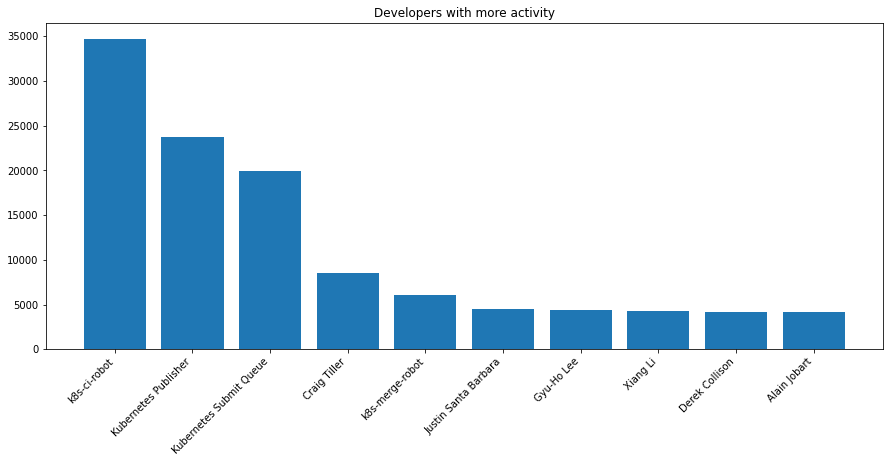

In [12]:
plt.figure(figsize=(15,6))
x = range(len(df_developers['developers']))
plt.bar(x, df_developers['n_commits'])
plt.xticks(x, df_developers['developers'], rotation=45, ha='right')
plt.title('Developers with more activity')
plt.show()

### 2.2 About repositories <a class="anchor" id="repositories">

#### A. How many commits are in CNCF database ignoring empty commits or merges?

In [13]:
s = Search(using=elastic, index=idx).filter('range', files={'gt':0})
s.aggs.metric('commits', 'cardinality', field='hash')
result = s.execute()
result.to_dict()["aggregations"]

{'commits': {'value': 364481}}

#### B. How many commits are done per year?

In [14]:
year = 2020

s = Search(using=elastic, index=idx).filter('range', author_date={'gt': datetime(year-1, 12, 12), 'lt': datetime(year, 1, 1)})
s.aggs.metric('commits', 'cardinality', field='hash')
result = s.execute()
result.to_dict()["aggregations"]

{'commits': {'value': 3930}}

In [15]:
years = range(2012, 2021)

output = []
for year in years:
    s = Search(using=elastic, index=idx).filter('range', author_date={'gt': datetime(year-1, 12, 12), 'lt': datetime(year, 1, 1)})
    s.aggs.metric('developers', 'cardinality', field='hash')
    result = s.execute()
    result = result.to_dict()["aggregations"]['developers']['value']
    output.append(result)

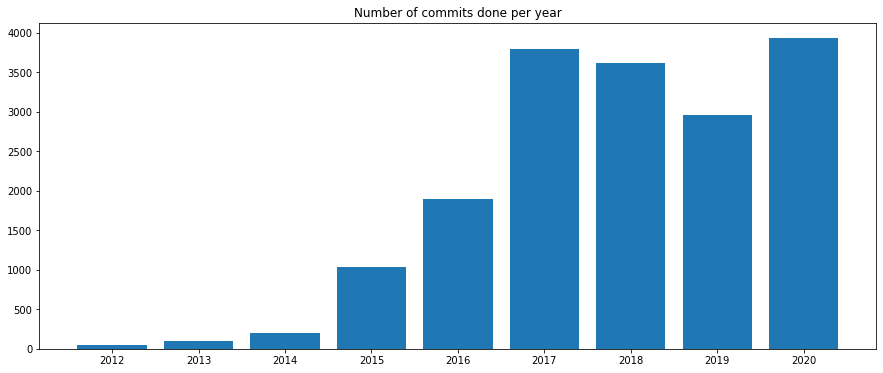

In [16]:
plt.figure(figsize=(15,6))
plt.bar(years, output)
plt.xticks(years, years)
plt.title('Number of commits done per year')
plt.show()

#### C. Wich are the 10 most active repositories?

In [17]:
s = Search(using=elastic, index=idx).filter('range', files={'gt':0})
s.aggs.bucket('by_repo', 'terms', field='repo_name', size = 10).metric('n_commits', 'cardinality', field='hash')
result = s.execute()
result = result.to_dict()["aggregations"]['by_repo']['buckets']
df_repositories = eq.documents_to_pandas(result).rename(columns = {'key':'repositories'})
df_repositories['repositories'] = df_repositories.repositories.apply(lambda col: '/'.join(col.split('/')[3:]))
df_repositories['n_commits'] = df_repositories.n_commits.apply(lambda x: x['value'])
df_repositories

,repositories,doc_count,n_commits
0,kubernetes/kubernetes.git,71194,71849
1,grpc/grpc.git,33941,33945
2,kubernetes/test-infra.git,21041,21071
3,vitessio/vitess.git,14689,14510
4,kubernetes/website.git,14363,14537
5,etcd-io/etcd.git,12581,12345
6,kubernetes/kops.git,8161,8122
7,kubernetes/minikube.git,7611,7570
8,goharbor/harbor.git,7340,7351
9,envoyproxy/envoy.git,6384,6379


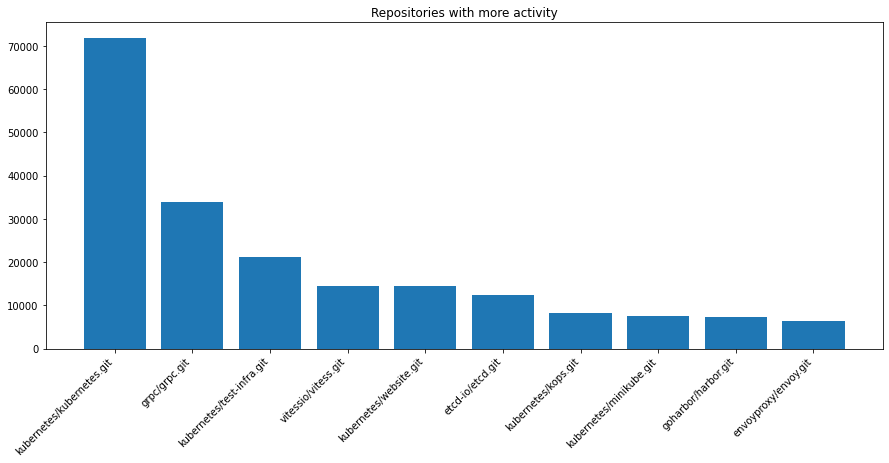

In [18]:
plt.figure(figsize=(15,6))
x = range(len(df_repositories['repositories']))
plt.bar(x, df_repositories['n_commits'])
plt.xticks(x, df_repositories['repositories'], rotation=45, ha='right')
plt.title('Repositories with more activity')
plt.show()

### 2.3 About organizations  <a class="anchor" id="organizations">

#### A. How many organizations are in the database?

In [19]:
s = Search(using=elastic, index=idx)
s.aggs.metric('Organizations', 'cardinality', field='author_org_name')

result = s.execute()
result.to_dict()["aggregations"]

{'Organizations': {'value': 161}}

#### B. Wich are the 10 most active organizations?

In [20]:
s = Search(using=elastic, index=idx)
s.aggs.bucket('organizations', 'terms', field='author_org_name', size = 11)
result = s.execute()
result = result.to_dict()["aggregations"]['organizations']['buckets']
df_organizations = eq.documents_to_pandas(result).rename(columns = {'key':'organizations', 'doc_count': 'n_commits'}).iloc[1:].reset_index(drop = True)
df_organizations

,organizations,n_commits
0,"Google, Inc.",55995
1,Red Hat,32234
2,"CoreOS, Inc.",6714
3,"Docker, Inc.",5275
4,Huawei,3835
5,FathomDB,3730
6,Independent,3312
7,SoundCloud Ltd,3169
8,VMWare,2442
9,IBM,1764


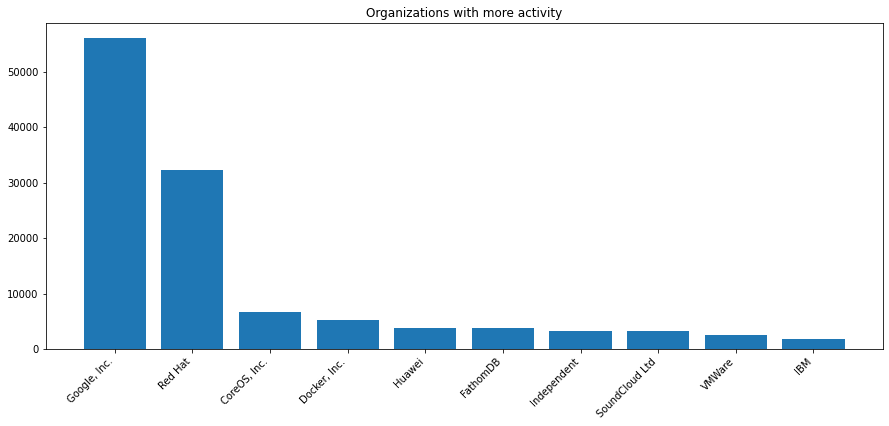

In [21]:
plt.figure(figsize=(15,6))
x = range(len(df_organizations['organizations']))
plt.bar(x, df_organizations['n_commits'])
plt.xticks(x, df_organizations['organizations'], rotation=45, ha='right')
plt.title('Organizations with more activity')
plt.show()

In [25]:
all_dfs = []
for year in years:
    s = Search(using=elastic, index=idx).filter('range', author_date={'gt': datetime(year-1, 12, 12), 'lt': datetime(year, 1, 1)})
    s.aggs.bucket('organization', 'terms', field='author_org_name')
    result = s.execute()
    result = result.to_dict()["aggregations"]['organization']['buckets']
    df_org = eq.documents_to_pandas(result).rename(columns = {'key':'organizations', 'doc_count': 'n_commits'})
    df_org['year'] = year
    all_dfs.append(df_org)
df_organizations_years = pd.concat(all_dfs)[pd.concat(all_dfs).organizations != 'Unknown']

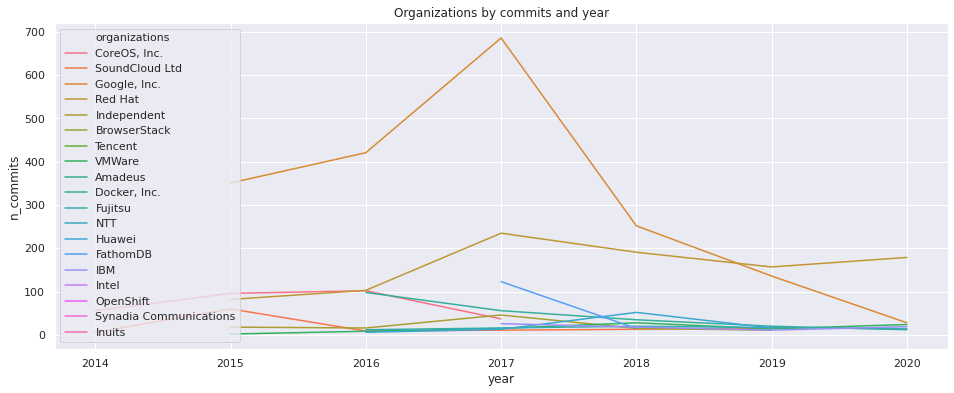

In [26]:
import seaborn as sns

sns.set(style='darkgrid',)
plt.figure(figsize=(16,6))
plt.title('Organizations by commits and year')
sns.lineplot(x='year', y='n_commits', hue='organizations', 
             data=df_organizations_years)
plt.show()